In [1]:
%pylab inline
import pandas as pd
import sys
import gc

Populating the interactive namespace from numpy and matplotlib


In [2]:
dim=(54, 4100, 1704)
def shuffle_XY(idx_date,idx_item,idx_store,X,y):
    idx=np.random.permutation(range(len(y)))
    return idx_date[idx],idx_item[idx],idx_store[idx], X[idx],y[idx]
def get_series(name):
    a=np.load("../input/s/"+name+".npz")
    #print a.files
    b=a['arr_0']
    assert b.shape==dim
    return b

In [3]:
def convert_nan(X):
    idx=np.isnan(X)
    X[idx]=0
    newx=np.concatenate([X,idx],axis=1)
    newx=newx.astype(np.float32,copy=False)
    return newx
def read_data(day):
    y=get_series('y_0') 
    return y  

In [4]:
%time y=read_data(1)
y[np.isnan(y)]=0
y[y>0]=1
y[:,:,1688:]=-10
y=y.astype(np.int8)

CPU times: user 4.03 s, sys: 244 ms, total: 4.28 s
Wall time: 4.27 s


In [5]:
(y[:,:,800:1688]).mean(dtype=np.float),(y[:,:,800:1688]).min(),(y[:,:,800:1688]).max()

(0.42101230295335984, 0, 1)

In [6]:
(y[:,:,900:1688]).mean(dtype=np.float)

0.43616262340711393

In [7]:
np.prod(y[:,:,900:1688].shape)

174463200

In [8]:
y.shape

(54, 4100, 1704)

In [9]:
def s_lag(arr,lag=1):
    l,m,n=arr.shape
    assert lag>0 
    a=arr[:,:,:-lag]
    b=np.empty(shape=[l,m,lag],dtype=arr.dtype)
    b.fill(0)
    ba=np.concatenate([b,a],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba
def s_forward(arr,step=1):
    l,m,n=arr.shape
    assert step>=0 and step<n
    a=arr[:,:,step:]
    b=np.empty(shape=[l,m,step],dtype=arr.dtype)
    b.fill(-10)
    ba=np.concatenate([a,b],axis=2)
    assert ba.shape==arr.shape
    assert ba.dtype==arr.dtype
    return ba

In [10]:
X=np.array([s_lag(y,i) for i in list(range(1,22))])
X=np.rollaxis(X,0,4)
y.shape,X.shape,X.nbytes/1024.**3

((54, 4100, 1704), (54, 4100, 1704, 21), 7.378475368022919)

In [11]:
y[:,:,1688].min(),y[:,:,1688].max(),y[:,:,1687].min(),y[:,:,1687].max()

(-10, -10, 0, 1)

In [12]:
X[:,:,1687].min(),X[:,:,1687].max(), \
X[:,:,1688].min(),X[:,:,1688].max(),\
X[:,:,1689].min(),X[:,:,1689].max()

(0, 1, 0, 1, -10, 1)

In [13]:
Y= np.array([ s_forward(y,i) for i in range(1)])
Y= np.rollaxis(Y,0,4)

In [14]:
y.shape,Y.shape,Y.nbytes/1024.**3

((54, 4100, 1704), (54, 4100, 1704, 1), 0.35135596990585327)

In [15]:
pd.DataFrame(X[0,0,1680:1697].reshape([17,-1]),index=range(1680,1697))

0   1   2   3   4   5   6   7   8   9  ...  11  12  13  14  15  16  17  \
1680   1   1   0   0   1   1   0   1   0   0 ...   0   0   0   0   0   1   1   
1681   0   1   1   0   0   1   1   0   1   0 ...   0   0   0   0   0   0   1   
1682   0   0   1   1   0   0   1   1   0   1 ...   0   0   0   0   0   0   0   
1683   1   0   0   1   1   0   0   1   1   0 ...   0   0   0   0   0   0   0   
1684   0   1   0   0   1   1   0   0   1   1 ...   1   0   0   0   0   0   0   
1685   0   0   1   0   0   1   1   0   0   1 ...   0   1   0   0   0   0   0   
1686   0   0   0   1   0   0   1   1   0   0 ...   1   0   1   0   0   0   0   
1687   0   0   0   0   1   0   0   1   1   0 ...   1   1   0   1   0   0   0   
1688   0   0   0   0   0   1   0   0   1   1 ...   0   1   1   0   1   0   0   
1689 -10   0   0   0   0   0   1   0   0   1 ...   0   0   1   1   0   1   0   
1690 -10 -10   0   0   0   0   0   1   0   0 ...   1   0   0   1   1   0   1   
1691 -10 -10 -10   0   0   0   0   0   1   0 ...   1   1   0   0   1   1   0   
1692 -10 -10 -10 -10   0   0   0   0   0   1 ...   0   1   1   0   0   1   1   
1693 -10 -10 -10 -10 -10   0   0   0   0   0 ...   0   0   1   1   0   0   1   
1694 -10 -10 -10 -10 -10 -10   0   0   0   0 ...   1   0   0   1   1   0   0   
1695 -10 -10 -10 -10 -10 -10 -10   0   0   0 ...   0   1   0   0   1   1   0   
1696 -10 -10 -10 -10 -10 -10 -10 -10   0   0 ...   0   0   1   0   0   1   1   

      18  19  20  
1680   0   0   0  
1681   1   0   0  
1682   1   1   0  
1683   0   1   1  
1684   0   0   1  
1685   0   0   0  
1686   0   0   0  
1687   0   0   0  
1688   0   0   0  
1689   0   0   0  
1690   0   0   0  
1691   1   0   0  
1692   0   1   0  
1693   1   0   1  
1694   1   1   0  
1695   0   1   1  
1696   0   0   1  

[17 rows x 21 columns]

In [16]:
pd.DataFrame(Y[0,0,1680:1697].reshape([17,-1]),index=range(1680,1697))

0
1680   0
1681   0
1682   1
1683   0
1684   0
1685   0
1686   0
1687   0
1688 -10
1689 -10
1690 -10
1691 -10
1692 -10
1693 -10
1694 -10
1695 -10
1696 -10

In [17]:
import cPickle as pickle
ex2,exy2=pickle.load(open('exy_d1.pkl'))
ex2,exy2=ex2.astype(np.float16),exy2.astype(np.float16)
ex2.shape,exy2.shape,ex2.mean(dtype=float),exy2.mean(dtype=float)

((54, 4100), (54, 4100), 2.6446552324165822, 3.2192492317399575)

# cv

In [18]:
def make_data(low,high):
    y_train=Y[:,:,low:high]
    X_train= X[:,:,low:high] 
    print X_train.shape
    a,b=X_train.reshape([-1,X_train.shape[-1]]),y_train.reshape([-1,Y.shape[-1]])
    ex2_y=np.ones_like(y_train)*np.expand_dims(np.expand_dims(ex2,-1),-1)
    exy2_y=np.ones_like(y_train)*np.expand_dims(np.expand_dims(exy2,-1),-1)
    c,d=ex2_y.reshape(b.shape),exy2_y.reshape(b.shape)
    print a.shape,b.shape,c.shape,d.shape
    return a,b,c,d

In [19]:
train_X,train_y,ex2_y,exy2_y=make_data(900,1688)

(54, 4100, 788, 21)
(174463200, 21) (174463200, 1) (174463200, 1) (174463200, 1)


In [20]:
train_X.shape,train_y.shape,train_X.dtype,train_y.dtype,ex2_y.dtype,exy2_y.dtype

((174463200, 21),
 (174463200, 1),
 dtype('int8'),
 dtype('int8'),
 dtype('float16'),
 dtype('float16'))

In [21]:
(train_X.nbytes+train_y.nbytes)/1024.0**3

3.5745933651924133

In [22]:
assert np.min(train_X)==0

In [23]:
from sklearn.model_selection import GridSearchCV,ParameterGrid,ParameterSampler
from sklearn.metrics import  make_scorer
from multiprocessing import Pool

In [24]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Activation, InputLayer, Dropout,BatchNormalization
from keras import metrics,backend,regularizers, backend as K, losses
import keras
import tensorflow as tf
from keras.engine.topology import Layer
from keras.backend.tensorflow_backend import set_session

Using TensorFlow backend.


In [25]:
print K.floatx()

float32


In [26]:
config = tf.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.intra_op_parallelism_threads=8
config.inter_op_parallelism_threads=8
set_session(tf.Session(config=config))

In [27]:
input_dim=train_X.shape[1]
output_dim=train_y.shape[1]
input_dim,output_dim

(21, 1)

In [28]:
class TransformNALayer(Layer):

    def __init__(self,   **kwargs):
        super(TransformNALayer, self).__init__(**kwargs)

    def build(self, input_shape):
        super(TransformNALayer, self).build(input_shape)  # Be sure to call this somewhere!

    def call(self, x):
        ind=tf.is_nan(x)
        filled_x=tf.where(ind, tf.zeros_like(x,dtype=np.float32), x)
        ind=tf.cast(ind,tf.float32)
        filled_x=tf.cast(filled_x,tf.float32)
        return  tf.cast(tf.concat([filled_x,ind],axis=1),tf.float32)

    def compute_output_shape(self, input_shape):
        return (input_shape[0], input_shape[1]*2)        

In [29]:
def binary_loss(ex2,exy2):
    ex2=tf.cast(ex2,tf.float32)
    exy2=tf.cast(exy2,tf.float32)
    def _binary_loss(y_true, y_pred):
        y_true=tf.cast(y_true,tf.float32)
        y_pred=tf.cast(y_pred,tf.float32)

        ind=tf.cast(y_true>=0, tf.float32)
        A=y_pred**2*ex2-tf.constant(2,tf.float32)*y_true*y_pred*exy2+y_true*tf.constant(3.92,tf.float32)
        return K.sum(A*ind)/K.sum(ind)
    return _binary_loss

def binary_accuracy(ex2,exy2):
    def _binary_accuracy(y_true, y_pred):
        y_true=tf.cast(y_true,tf.float32)
        y_pred=tf.cast(y_pred,tf.float32)    
        ind=tf.cast(y_true>=0, tf.float32)
        pred=tf.cast(y_pred>0.5,tf.float32)
        A= K.sum(tf.cast(y_true*pred,tf.float32)*ind)/K.sum(ind)
        return A
    return _binary_accuracy

In [30]:
def g(y_true,y_pred):
    with tf.Session() as sess:
        y_true=tf.cast(y_true,tf.float32)
        y_pred=tf.cast(y_pred,tf.float32)
        ind=tf.cast(y_true>=0, tf.float32)
        pred=tf.cast(y_pred>0.5,tf.float32)
        A= K.sum(tf.cast(y_true*pred,tf.float32)*ind)/K.sum(ind)
        print sess.run(A)
#g([0,1,0,-10],[0,1,0,1])

In [31]:
class KerasModel:
    def __init__(self,params={}):
        self.params=params
        self.model=None
    def _make_model(self):
        params=self.params
        #model = Sequential()
        X_input = keras.layers.Input(shape=params['input_dim'],name="X")
        ex2_input = keras.layers.Input(shape=(params['output_dim'],),name="ex2")
        exy2_input = keras.layers.Input(shape=(params['output_dim'],),name="exy2")

        X2 = keras.layers.Lambda(lambda u: tf.expand_dims((tf.cast(u,tf.float32)-tf.constant(0.,tf.float32)),-1))(X_input)
        hidden_size=params['hidden_size']
        encoded_state= (keras.layers.CuDNNLSTM(hidden_size))(X2)
        encoded_state=(keras.layers.RepeatVector(params['output_dim']))(encoded_state)
        decoded_state=((keras.layers.CuDNNLSTM(hidden_size, return_sequences=True)))(encoded_state)
        
        fc=(keras.layers.TimeDistributed(keras.layers.Dense(1)))(decoded_state)
        fc_act=(keras.layers.Activation('sigmoid'))(fc)
        fc_act = (keras.layers.Lambda(lambda u: tf.squeeze(u,-1)))(fc_act)
        
        model=keras.models.Model(inputs=[X_input,ex2_input,exy2_input],outputs=fc_act)
        this_loss=binary_loss(ex2_input,exy2_input)
        this_metrics=[binary_accuracy(ex2_input,exy2_input)]
        model.compile(optimizer=params['optimizer'],
          loss=this_loss,
           metrics=this_metrics)

        self.model=model
        return self
    def fit(self,X_train,y_train, ex2_y,exy2_y ):
        params=self.params
        validation_split=params['validation_split']
        patience=params['patience']
        if self.model is None:
            self._make_model()
        metric_name=self.model.metrics_names[-1]
        #print "earlystopping on "+metric_name
        self.name='nonnan_day1.h5'
        early_stopping = EarlyStopping(monitor='val_loss', patience=patience)
        checkpoint = keras.callbacks.ModelCheckpoint(self.name, monitor='val_loss', 
                                                     verbose=1, 
                                                     save_best_only=True, 
                                                     save_weights_only=False, mode='min', period=0)        
        batch_size=params['batch_size']
        self.model.fit({"X": X_train,'ex2':ex2_y,'exy2':exy2_y}, y_train, batch_size=batch_size,epochs=200, 
                        validation_split=validation_split, 
                       #validation_data=(X_valid,y_valid),
                       callbacks=[early_stopping,checkpoint],verbose=1)
        return self
    def load_best(self):
        return keras.models.load_model(self.name,
                                       custom_objects={'TransformNALayer':TransformNALayer})
    

In [32]:
param_grid={'input_dim':[(input_dim, )],
            'output_dim':[output_dim],
            'batch_size':[4096],
            'hidden_size': [ 256],
            "validation_split":[0.1],"patience":[2],
            "dropout_rate":[0.0],
            "l2":[1e-4,0],
            'batch_normalization': [True],
            "optimizer":['adam','adam','adagrad']
           }
parameters=list(ParameterGrid(param_grid))
len(parameters)

6

In [33]:
parameter=parameters[0]
parameter

{'batch_normalization': True,
 'batch_size': 4096,
 'dropout_rate': 0.0,
 'hidden_size': 256,
 'input_dim': (21,),
 'l2': 0.0001,
 'optimizer': 'adam',
 'output_dim': 1,
 'patience': 2,
 'validation_split': 0.1}

In [34]:
if 0:
    from IPython.display import SVG
    from keras.utils.vis_utils import model_to_dot
    for l in a.model.layers:
        print l, l.input_shape 
    display(SVG(model_to_dot(a.model).create(prog='dot', format='svg')))
   

In [35]:
backend.clear_session()
set_session(tf.Session(config=config)) 
a=KerasModel(parameter)
a._make_model()
a.params

{'batch_normalization': True,
 'batch_size': 4096,
 'dropout_rate': 0.0,
 'hidden_size': 256,
 'input_dim': (21,),
 'l2': 0.0001,
 'optimizer': 'adam',
 'output_dim': 1,
 'patience': 2,
 'validation_split': 0.1}

In [36]:
a.model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
X (InputLayer)               (None, 21)                0         
_________________________________________________________________
lambda_1 (Lambda)            (None, 21, 1)             0         
_________________________________________________________________
cu_dnnlstm_1 (CuDNNLSTM)     (None, 256)               265216    
_________________________________________________________________
repeat_vector_1 (RepeatVecto (None, 1, 256)            0         
_________________________________________________________________
cu_dnnlstm_2 (CuDNNLSTM)     (None, 1, 256)            526336    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 1, 1)              257       
_________________________________________________________________
activation_1 (Activation)    (None, 1, 1)              0         
__________

In [37]:
a.fit(train_X[:],train_y[:],ex2_y[:],exy2_y[:])

Train on 157016880 samples, validate on 17446320 samples
Epoch 1/200
157016880/157016880 [==============================] - 2700s 17us/step - loss: 0.2485 - _binary_accuracy: 0.4079 - val_loss: 0.0737 - val__binary_accuracy: 0.3636
Epoch 2/200
157016880/157016880 [==============================] - 2720s 17us/step - loss: 0.2475 - _binary_accuracy: 0.4079 - val_loss: 0.0736 - val__binary_accuracy: 0.3660
Epoch 3/200
157016880/157016880 [==============================] - 2681s 17us/step - loss: 0.2474 - _binary_accuracy: 0.4080 - val_loss: 0.0734 - val__binary_accuracy: 0.3669
Epoch 4/200
157016880/157016880 [==============================] - 2702s 17us/step - loss: 0.2474 - _binary_accuracy: 0.4080 - val_loss: 0.0735 - val__binary_accuracy: 0.3663
Epoch 5/200
157016880/157016880 [==============================] - 2717s 17us/step - loss: 0.2473 - _binary_accuracy: 0.4080 - val_loss: 0.0736 - val__binary_accuracy: 0.3673


<__main__.KerasModel instance at 0x7f94c1a7a3f8>

In [62]:
from sklearn.metrics import mean_squared_error,accuracy_score,roc_auc_score

In [60]:
rawy=get_series('y_0')
rawy.shape

(54, 4100, 1704)

In [68]:
import cPickle as pickle
day1info=pickle.load(open("day1_adam.h5.info"))

In [46]:
def dummy(u,v):
    return u+v
model = keras.models.load_model('nonnan_day1.h5',
                               custom_objects={'_binary_loss':dummy, '_binary_accuracy':dummy, 'tf':tf})

In [58]:
X.shape,ex2.shape,exy2.shape,Y.shape,y.shape

((54, 4100, 1704, 21),
 (54, 4100),
 (54, 4100),
 (54, 4100, 1704, 1),
 (54, 4100, 1704))

In [83]:
def MSE(y_true,y_pred):
    ind=~np.isnan(y_true)
    return mean_squared_error(y_true[ind],y_pred[ind])
def MSE2(y_true,y_pred):
    y_true=y_true.copy()
    y_true[np.isnan(y_true)]=0
    return mean_squared_error(y_true,y_pred)

In [86]:
for i in range(1500,1688):
    ax=X[:,:,i].reshape([-1,X.shape[-1]])
    arawy=rawy[:,:,i].reshape([-1])
    apred=day1info[1][i-1500].reshape([-1])
    yy_pred3=model.predict(ax,4096)[:,0]
    print i, accuracy_score(arawy>0,yy_pred3>0.5),roc_auc_score(arawy>0,yy_pred3), \
            MSE(arawy,apred), MSE2(arawy,yy_pred3*apred)
    

1500 0.850429087624 0.935915951027 0.25391 0.271663
1501 0.860420054201 0.941255585927 0.25269 0.262274
1502 0.883369467028 0.954215569352 0.24487 0.257482
1503 0.886309846432 0.955289367059 0.24915 0.264002
1504 0.867836495032 0.944341116205 0.26147 0.282846
1505 0.851571815718 0.935586802028 0.27051 0.288035
1506 0.863057813911 0.942359691201 0.24792 0.262957
1507 0.854539295393 0.9372308905 0.25952 0.276437
1508 0.86266034327 0.942356835918 0.2522 0.267018
1509 0.886738934056 0.9558802175 0.25269 0.271773
1510 0.871594399277 0.94837265246 0.26074 0.273916
1511 0.865234869015 0.943192349514 0.2522 0.272825
1512 0.862958446251 0.942547711473 0.24304 0.261987
1513 0.859724480578 0.940882243077 0.25244 0.266052
1514 0.858929539295 0.938770865361 0.24768 0.266338
1515 0.866666666667 0.943823739298 0.26343 0.273086
1516 0.885943992773 0.954640469996 0.27515 0.285597
1517 0.859272809395 0.939385346275 0.28198 0.293057
1518 0.856485998193 0.9383352306 0.271 0.283335
1519 0.874182475158 0.94

1659 0.856169828365 0.938699663805 0.25146 0.274699
1660 0.856097560976 0.938943112662 0.245 0.266113
1661 0.853482384824 0.936949966351 0.24634 0.266427
1662 0.857746160795 0.940094526107 0.25171 0.265504
1663 0.876657633243 0.95031012579 0.24414 0.259568
1664 0.879525745257 0.951648168724 0.24475 0.262692
1665 0.866472448058 0.944022954899 0.25122 0.271762
1666 0.857393857272 0.939743603268 0.24622 0.268115
1667 0.855618789521 0.938820942215 0.24658 0.26441
1668 0.846522131888 0.933178082295 0.26904 0.281945
1669 0.861589882565 0.941017531772 0.26831 0.274006
1670 0.87906504065 0.951136994513 0.25439 0.272046
1671 0.880067750678 0.951713076625 0.25195 0.272315
1672 0.870799457995 0.946143036121 0.24841 0.270288
1673 0.877484191509 0.949706921546 0.26807 0.282526
1674 0.874430894309 0.948583264897 0.25317 0.270699
1675 0.859196025294 0.938759806631 0.26685 0.286709
1676 0.864512195122 0.942986035997 0.26025 0.274237
1677 0.881522131888 0.952390821239 0.24316 0.263136
1678 0.8813369467

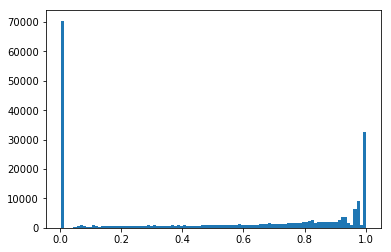

In [56]:
plt.hist(yy_pred3,bins=100);

In [37]:
accuracy_score(y_test,a.model.predict(X_test,4096)[:,0]>0.5)

0.86736369208930186

# predict

In [47]:
model = keras.models.load_model('nonnan_day1.h5',
                                       custom_objects={'TransformNALayer':TransformNALayer})

In [48]:
import cPickle as pickle
stores_idx,items_idx,days_idx,states,cities,families,types = pickle.load(open("array_index.pkl"))
rev_stores={v:u for u,v in stores_idx.items()}
rev_items={v:u for u,v in items_idx.items()}
rev_days={v:u for u,v in days_idx.items()}


In [49]:
X_valid.shape

(4428000, 21, 1)

In [50]:
X.shape,y.shape

((21, 54, 4100, 1704), (54, 4100, 1704))

In [51]:
def predict_date(d):
    pred=model.predict(np.expand_dims(X[:,:,:,d].reshape([21,-1]).T,-1),4096)[:,0]
    a=y[:,:,d].reshape(-1)
    return a,pred

In [52]:
for i in range(1600,1688):
    a,b=predict_date(i)
    print i, np.mean(a==(b>0.5))

1600 0.88032068654
1601 0.882267389341
1602 0.861924119241
1603 0.857795844625
1604 0.855514905149
1605 0.848116531165
1606 0.87098464318
1607 0.875654923216
1608 0.879155374887
1609 0.862073170732
1610 0.861368563686
1611 0.867434507678
1612 0.865036133695
1613 0.868261065944
1614 0.883952122855
1615 0.88640469738
1616 0.867014453478
1617 0.860496838302
1618 0.860889792231
1619 0.850090334237
1620 0.859141824752
1621 0.878116531165
1622 0.883310749774
1623 0.860433604336
1624 0.857366757001
1625 0.858446251129
1626 0.854539295393
1627 0.862904245709
1628 0.880740740741
1629 0.875018066847
1630 0.864927732611
1631 0.863902439024
1632 0.859661246612
1633 0.849485094851
1634 0.858486901536
1635 0.877791327913
1636 0.878093947606
1637 0.862768744354
1638 0.856793134598
1639 0.85662601626
1640 0.85310298103
1641 0.865858175248
1642 0.883532068654
1643 0.887055103884
1644 0.87401535682
1645 0.867818428184
1646 0.865478771454
1647 0.856924119241
1648 0.86293134598
1649 0.879801264679
1650 0.

In [ ]:
def f():
    a=np.zeros(y.shape[:2])
    for i in range(a.shape[0]):
        a[i]=rev_stores[i]
    b=np.zeros(y.shape[:2])
    for i in range(b.shape[1]):
        b[:,i]=rev_items[i]        
    return a.reshape(-1).astype(np.int),b.reshape(-1).astype(np.int)

In [73]:
rev_days[1688]

Timestamp('2017-08-16 00:00:00', freq='D')

In [74]:
a,b=f()

In [80]:
X.shape

(14, 54, 4100, 1704)

In [84]:
pred_prob=model.predict(np.expand_dims(X[:,:,:,1688].reshape([14,-1]).T,-1),4096)[:,0]

In [86]:
preddf=pd.DataFrame({'store_nbr':a,'item_nbr':b,'pred_prob':pred_prob})
preddf['date']=str(rev_days[1688].date())
preddf.head()

item_nbr  pred_prob  store_nbr        date
0     96995   0.322469          1  2017-08-16
1     99197   0.232614          1  2017-08-16
2    103501   0.002426          1  2017-08-16
3    103520   0.535008          1  2017-08-16
4    103665   0.803716          1  2017-08-16

In [88]:
preddf.shape

(221400, 4)

In [89]:
sample=pd.read_csv("../input/test.csv")
sample['onpromotion']=sample['onpromotion'].astype(np.bool)

In [90]:
subm=pd.merge(sample,preddf,how='left',on=['date','item_nbr','store_nbr'])

In [93]:
subm=subm.set_index('id')

In [95]:
day_sub=pd.read_csv('../submission/day1.csv',index_col=0)

/home/bo/anaconda2/envs/tensorflow14/lib/python2.7/site-packages/numpy/lib/arraysetops.py:379: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [121]:
subm['sales']=np.log1p(day_sub['unit_sales'])

In [122]:
subm['unit_sales']=np.expm1(subm['sales']*subm['pred_prob'])

In [123]:
subm[['unit_sales']].fillna(0).to_csv('../submission/day1_adjprob.csv')

In [107]:
a=pd.read_csv("../submission/median_ma8_day0.csv",index_col=0).values
a[a>0].mean(),a[a>0].std(),sum(a>0),a.mean(),a.std()

(4.2958050686688392,
 10.627020537041084,
 149704,
 0.19080435275380486,
 2.4081857356544689)

In [127]:
a=pd.read_csv("../submission/day1_adjprob.csv",index_col=0).values
a[a>0].mean(),a[a>0].std(),sum(a>0),a.mean(),a.std()

(2.9860279338578568,
 9.2176175938473097,
 210654,
 0.18662674586611605,
 2.4151030548900008)

# prediction

In [8]:
import numpy as np
a=1.219
np.sqrt(-1.338**2*4+a**2*5)

0.51848722260051994

In [6]:
np.sqrt(0.272/(0.3*1.25+0.7)),np.sqrt(0.272)

(0.50301417058961029, 0.52153619241621196)